In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

### Form factor of a Spherical micelle

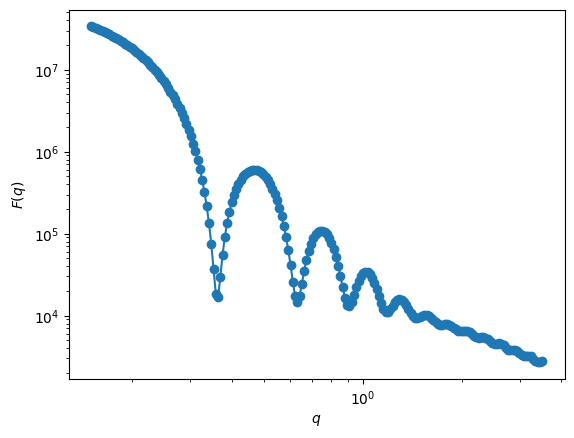

In [2]:
from scattersim.particles.micelles import SphericalMicelle

pargs_sphere_micelle = {"radius_core" : 10.0,
                        "rg":1.0
                        }
micelle = SphericalMicelle(pargs_sphere_micelle)

q = np.geomspace(0.015, 0.35, 200)*10
sq_micelle = micelle.form_factor_squared_isotropic(q)

fig, ax = plt.subplots()
ax.loglog(q, sq_micelle, "-o")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$F(q)$")
plt.show()

### Make the spherical micelle Polydisperse

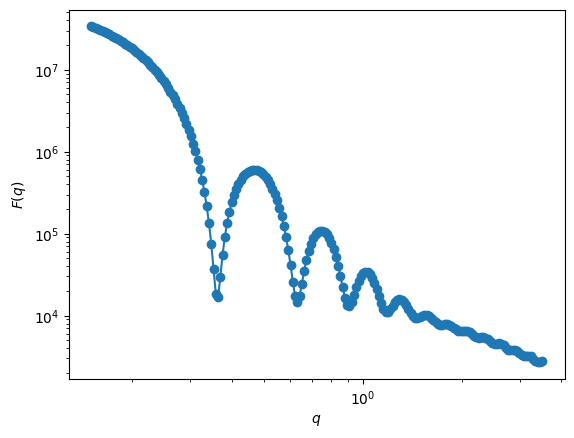

In [3]:
from scattersim.particles.base import PolydisperseNanoObject

pargs_sphere_micelle_pd = {"radius_core" : 10.0,
                           "rg":1.0,
                           "sigma_radius_core" :2.0,
                           }
pd_micelle = PolydisperseNanoObject(SphericalMicelle, 
                                    pargs_sphere_micelle_pd,
                                    argname='radius_core', 
                                    argstdname='sigma_radius_core'
                                    )
sq_micelle_pd = pd_micelle.form_factor_squared_isotropic(q)

fig, ax = plt.subplots()
ax.loglog(q, sq_micelle_pd, "-o")
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$F(q)$")
plt.show()

### Place the spherical micelle in a simple cubic unit cell

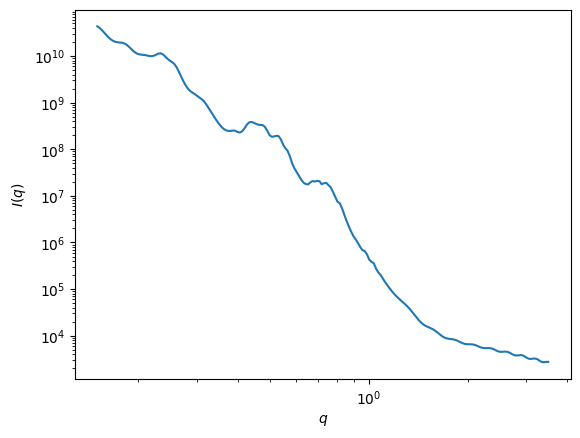

In [18]:
from scattersim.lattices.simple_cubic import SimpleCubic
from scattersim.utils import PeakShape

lattice_spacing = 60.0
sigma_D = 0.02 # add a Debye-Waller factor
lattice = SimpleCubic([pd_micelle], 
                     lattice_spacing_a=lattice_spacing, 
                     sigma_D=sigma_D
                     )
peak = PeakShape(delta=0.03, nu=0.01) 

Z0_sc = lattice.intensity(q, peak)
Pq_sc = lattice.form_factor_squared_isotropic(q)

c = .1
Gq = lattice.G_q(q)

Sq_sc = c*Z0_sc/Pq_sc*Gq + (1-Gq) # assuming beta(q) = 1
Iq_sc = Pq_sc*Sq_sc 

fig, ax = plt.subplots()
ax.loglog(q, Iq_sc)
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$I(q)$")
plt.show()

### Spherical micelle in a BCC lattice

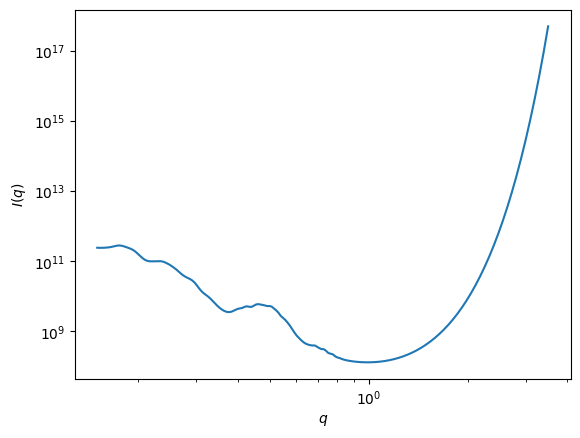

In [20]:
from scattersim.lattices.bcc import BCC

lattice_spacing = 80.0 
sigma_D = 0.02 # add a Debye-Waller factor
lattice = BCC([pd_micelle],
              lattice_spacing_a=lattice_spacing,
              sigma_D=sigma_D
              )
peak = PeakShape(delta=0.03, nu=0.01) 

Z0_bcc = lattice.intensity(q, peak)
Pq_bcc = lattice.form_factor_squared_isotropic(q)
c_bcc = .1
Gq_bcc = lattice.G_q(q)

Sq_bcc = (c_bcc*Z0_bcc)/(Pq_bcc*Gq_bcc) + (1-Gq_bcc) # assuming beta(q) = 1
Iq_bcc = Pq_bcc*Sq_bcc

fig, ax = plt.subplots()
ax.loglog(q, Iq_bcc)
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$I(q)$")
plt.show()

### Spherical  micelle in an FCC lattice

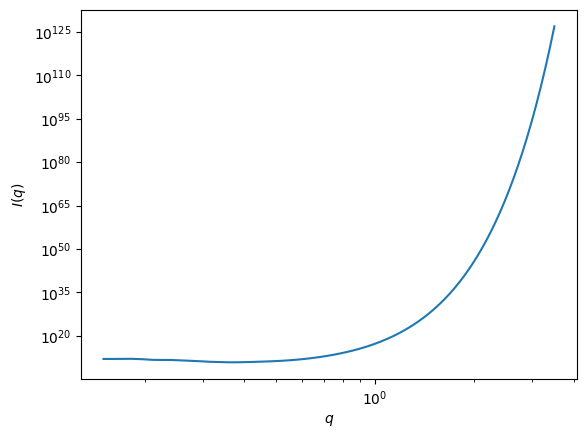

In [21]:
from scattersim.lattices.fcc import FCC

lattice_spacing = 80.0
sigma_D = 0.06 # add a Debye-Waller factor
lattice = FCC([pd_micelle],
              lattice_spacing_a=lattice_spacing,
              sigma_D=sigma_D
              )
peak = PeakShape(delta=0.03, nu=0.01) 

Z0_fcc = lattice.intensity(q, peak)
Pq_fcc = lattice.form_factor_squared_isotropic(q)
c_fcc = .1
Gq_fcc = lattice.G_q(q)

Sq_fcc = (c_fcc*Z0_fcc)/(Pq_fcc*Gq_fcc) + (1-Gq_fcc) # assuming beta(q) = 1
Iq_fcc = Pq_fcc*Sq_fcc

fig, ax = plt.subplots()
ax.loglog(q, Iq_fcc)
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$I(q)$")
plt.show()